<a href="https://colab.research.google.com/github/alvinmhabieb/Statistics-For-Business-Pacmann/blob/main/Permodelan_Linier_Regression_Harga_Rumah_di_Tebet_Jakarta_Selatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The house price dataset is a list of house prices which is house price data for the Tebet, South Jakarta area. Data is taken and collected from several sales websites such as rumah123.com.

**HOME DATA AT TEBET**

The Tebet house price dataset consists of 8 columns with a total of 1100 data. The column consists of:
* NO : data number.
* HOUSE NAME: the title of the house.
* PRICE: the price of the house.
* LB : total building area.
* LT : total land area.
* KT : number of bedrooms.
* KM : number of bathrooms.
* GRS : total car capacity in the garage.

**Acknowledgments**

Thanks to Rumah123.com as a website for selling houses/properties.

Link:
https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah

# Import Libraries

In [67]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Inspection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd 'drive/My Drive/Colab Notebooks/dataset'

/content/drive/My Drive/Colab Notebooks/dataset


In [136]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/DATA RUMAH.xlsx')

In [137]:
df

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


In [70]:
df.isnull().values.any()

False

In [138]:
df = df.dropna()  # Menghapus baris yang mengandung data yang hilang

In [139]:
df = df.drop(['NO', 'NAMA RUMAH'], axis=1)
df

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3
...,...,...,...,...,...,...
1005,9000000000,450,550,10,10,3
1006,4000000000,160,140,4,3,2
1007,4000000000,139,230,4,4,1
1008,19000000000,360,606,7,4,0


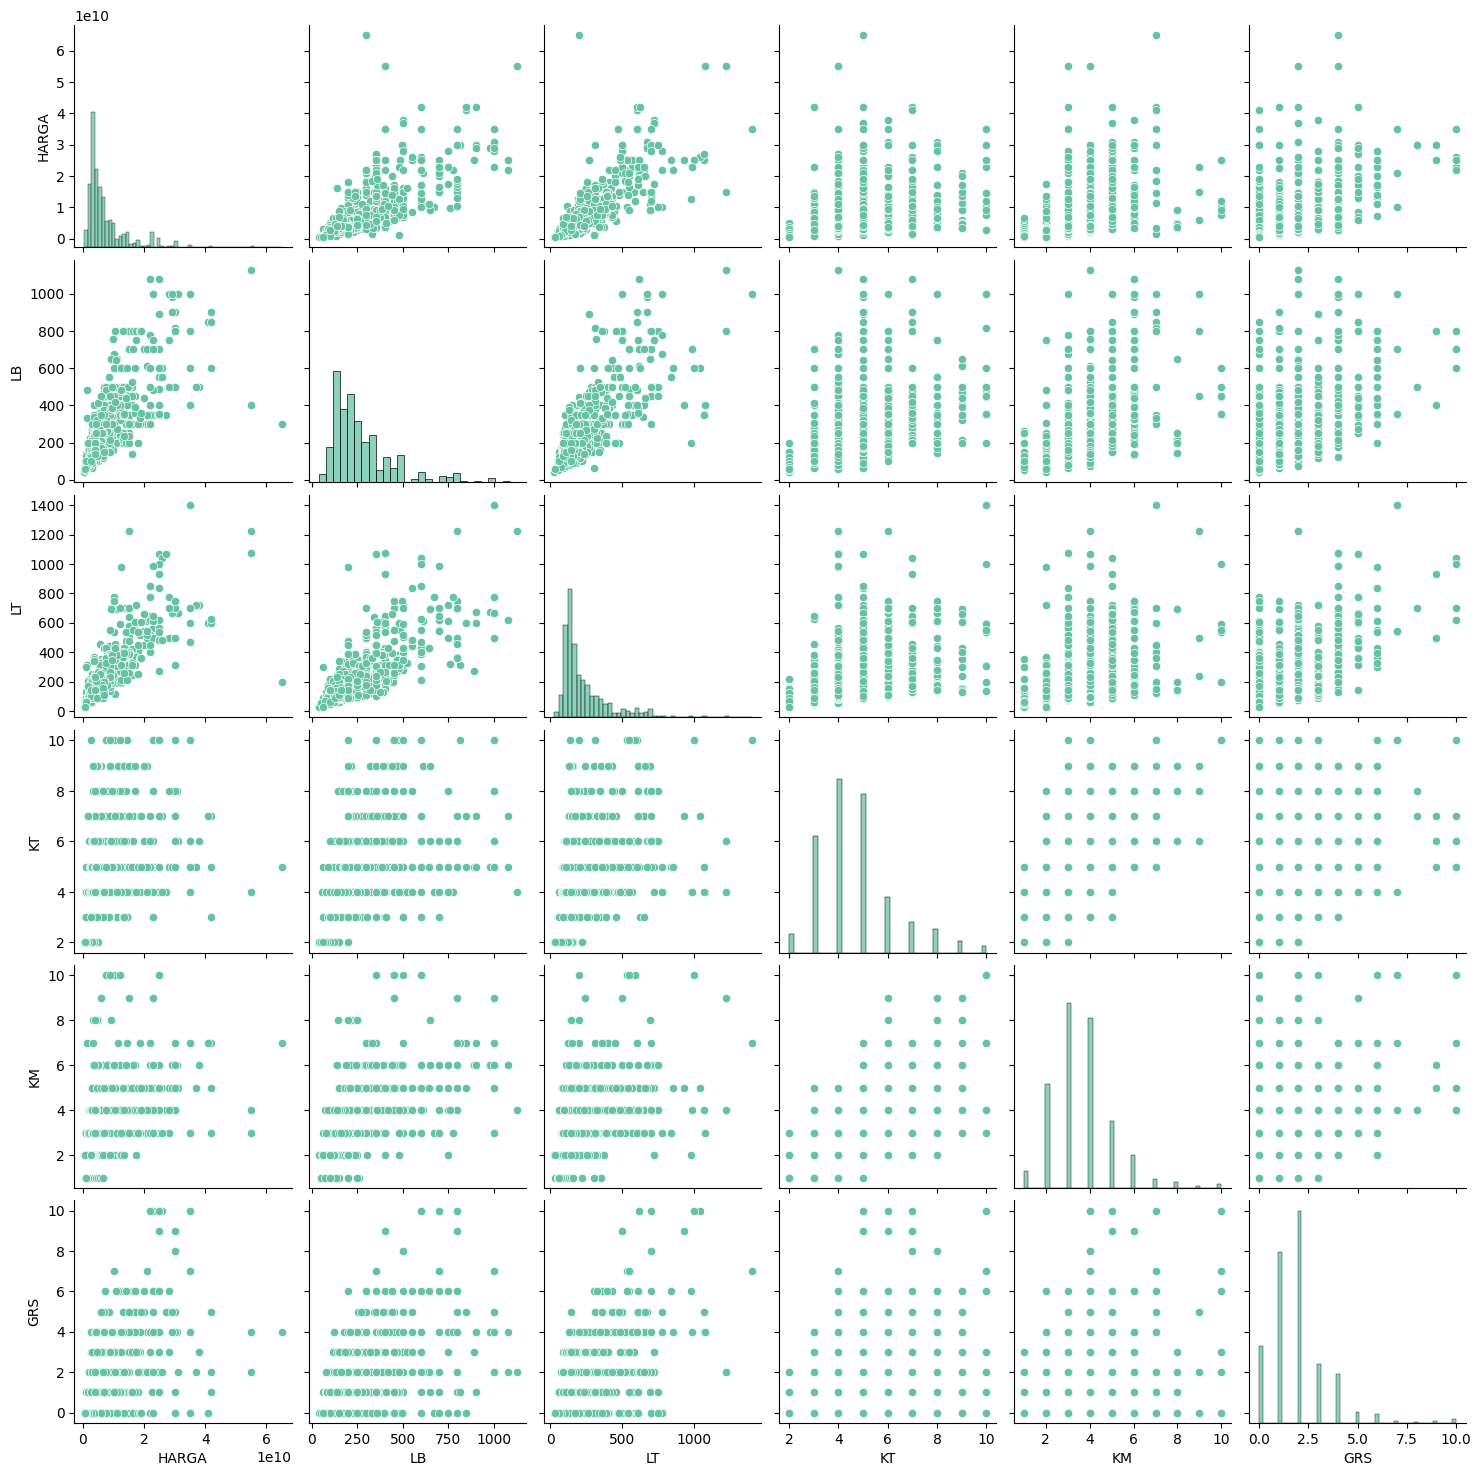

In [73]:
sns.pairplot(df)
plt.show()

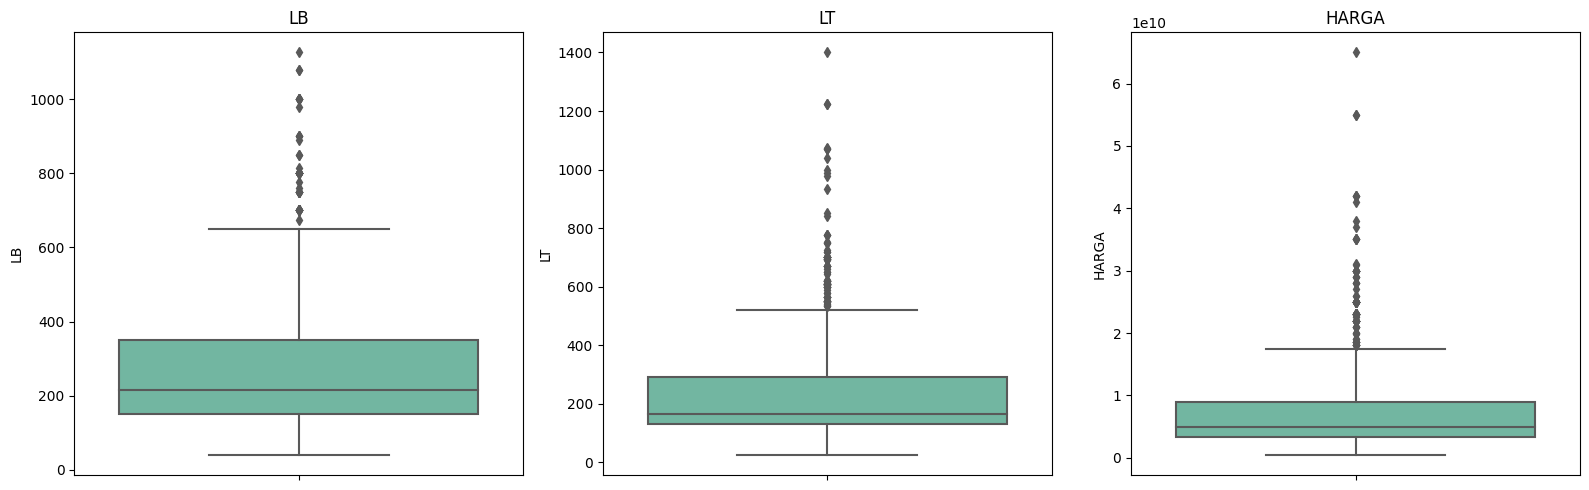

In [140]:
# Boxplot before removing outliers
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
titles = ['LB', 'LT', 'HARGA']

for ax, title in zip(axs, titles):
    sns.boxplot(y=df[title], ax=ax)
    ax.set_title(title)
fig.tight_layout()

In [141]:
# Removing outliers
Q1 = df[['LB', 'LT', 'HARGA']].quantile(0.25)
Q3 = df[['LB', 'LT', 'HARGA']].quantile(0.75)
IQR = Q3 - Q1
Lwhisker = Q1 - 1.5 * IQR
Uwhisker = Q3 + 1.5 * IQR
df_cleaned = df[((df['LB'] >= Lwhisker['LB']) & (df['LB'] <= Uwhisker['LB'])) &
                ((df['LT'] >= Lwhisker['LT']) & (df['LT'] <= Uwhisker['LT'])) &
                ((df['HARGA'] >= Lwhisker['HARGA']) & (df['HARGA'] <= Uwhisker['HARGA']))]

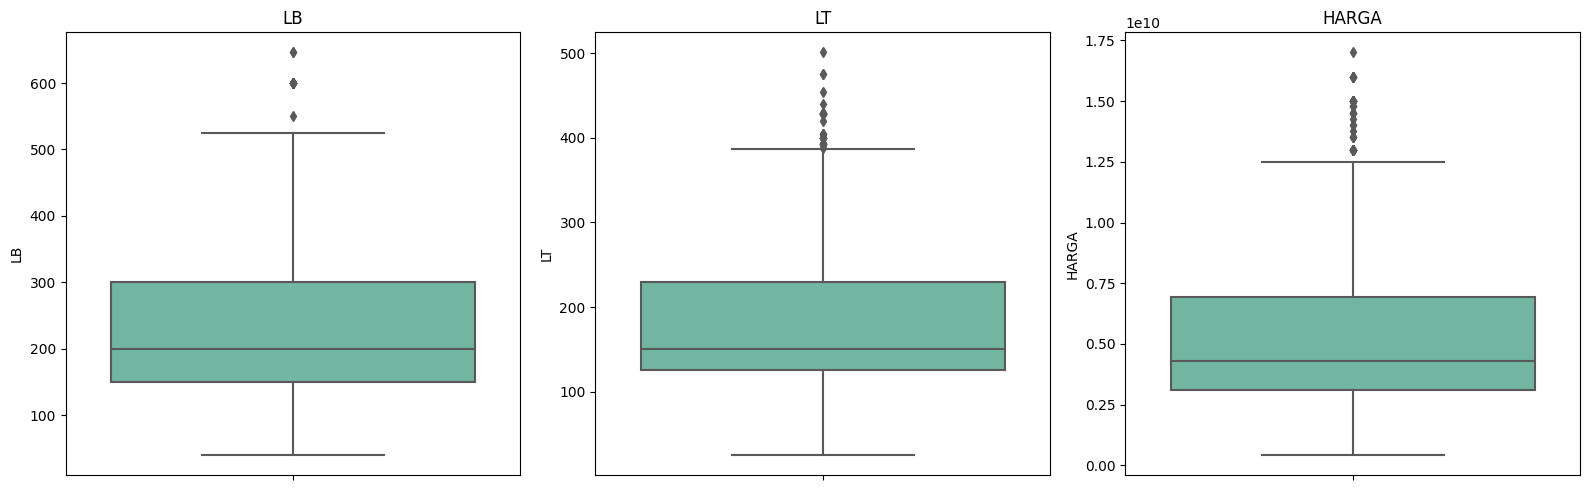

In [142]:
# Boxplot after removing outliers
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
titles = ['LB', 'LT', 'HARGA']

for ax, title in zip(axs, titles):
    sns.boxplot(y=df_cleaned[title], ax=ax)
    ax.set_title(title)
fig.tight_layout()

In [143]:
# Menggabungkan hasil remove outlier ke dalam data df
df = df.merge(df_cleaned[['LB', 'LT', 'HARGA']], how='inner', on=['LB', 'LT', 'HARGA'])

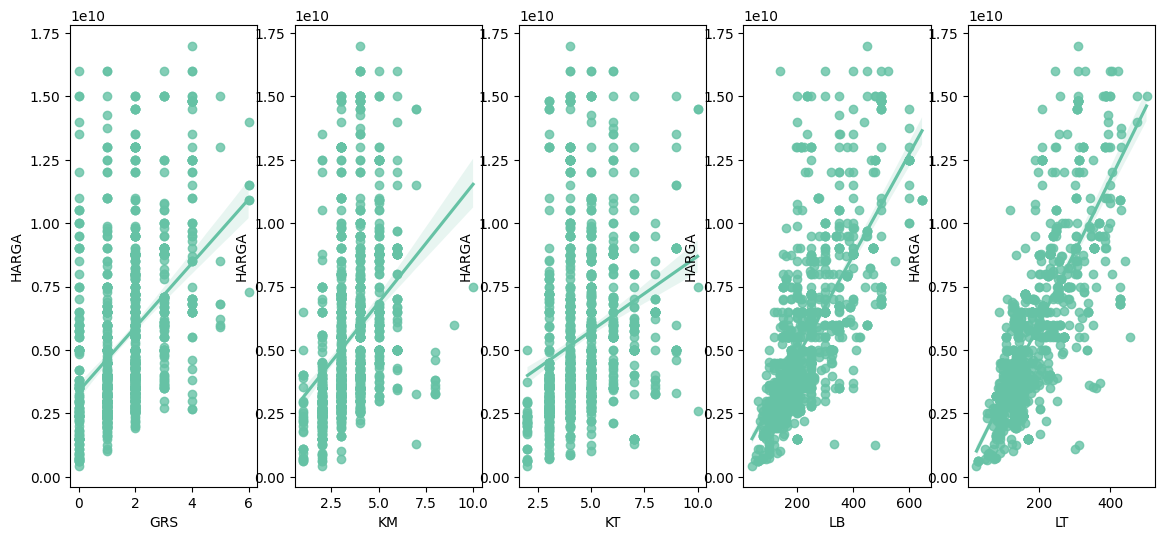

In [78]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(14, 6), dpi=100)
sns.regplot(data=df, x="GRS", y="HARGA", ax=axs[0])
sns.regplot(data=df, x="KM", y="HARGA", ax=axs[1])
sns.regplot(data=df, x="KT", y="HARGA", ax=axs[2])
sns.regplot(data=df, x="LB", y="HARGA", ax=axs[3])
sns.regplot(data=df, x="LT", y="HARGA", ax=axs[4])
plt.show()

In [79]:
# Utils

# draw a boxen of a categorical variable along with
# how it effects the target variable which is in this case 'price'
def draw_cate_vs_target(df, feature):
    plt.grid(True)
    ax = sns.violinplot(data=df, x=feature, y=df["HARGA"])
    ax.set_title(f'{feature} vs HARGA', fontdict={'fontsize': 18})

# draw the countplot of a categorical variable
def draw_cate_countplot(df, feature):
    plt.grid(True)
    ax = sns.countplot(x=df[feature])
    ax.set_title(f'{feature}\'s count', fontdict={'fontsize': 18})

# draw distribution plot for a numeric feature
def draw_numeric_dist(df, feature):
    ax = sns.kdeplot(df[feature], fill=True)
    plt.grid(True)
    ax.set_title(f'{feature}\'s distribution', fontdict={'fontsize': 18})

# draw scatter plot for a numeric feature vs price
def draw_numeric_target_scatter(df, feature):
    ax = sns.scatterplot(data=df, x=feature, y=df["HARGA"])
    ax.set_title(f'{feature} vs HARGA', fontdict={'fontsize': 18})
    plt.grid(True)

# Exploratory Data Analysis

In [146]:
# Menggunakan df.describe() dan membulatkan desimal menjadi 2 angka di belakang koma
df.describe().round(2)

,HARGA,LB,LT,KT,KM,GRS
count,1.213000e+03,1213.00,1213.00,1213.00,1213.00,1213.00
mean,5.504045e+09,239.93,182.14,4.57,3.55,1.69
std,3.215355e+09,115.10,87.42,1.49,1.27,1.09
min,4.300000e+08,40.00,25.00,2.00,1.00,0.00
25%,3.250000e+09,150.00,125.00,4.00,3.00,1.00
50%,4.500000e+09,200.00,150.00,4.00,3.00,2.00
75%,7.000000e+09,300.00,230.00,5.00,4.00,2.00
max,1.700000e+10,646.00,501.00,10.00,10.00,6.00


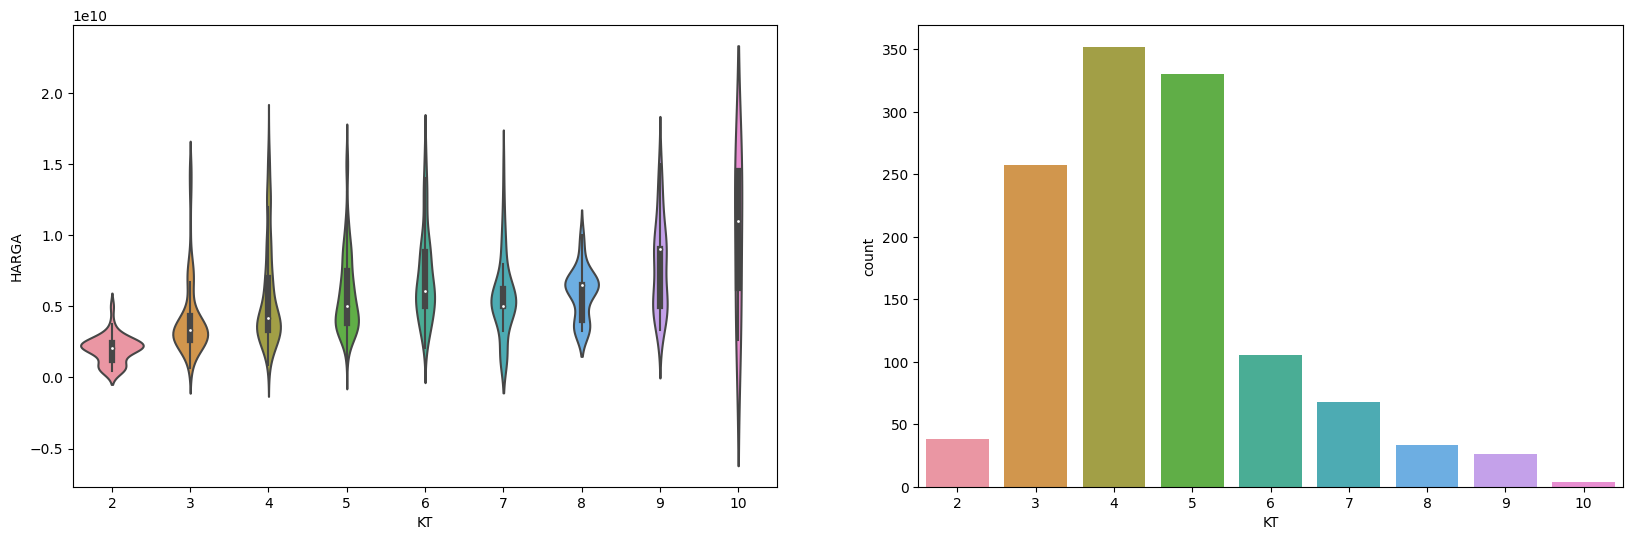

In [80]:
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')

plt.subplot(1, 2, 1)
sns.violinplot(x=df['KT'], y=df['HARGA'])

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='KT')

plt.show()

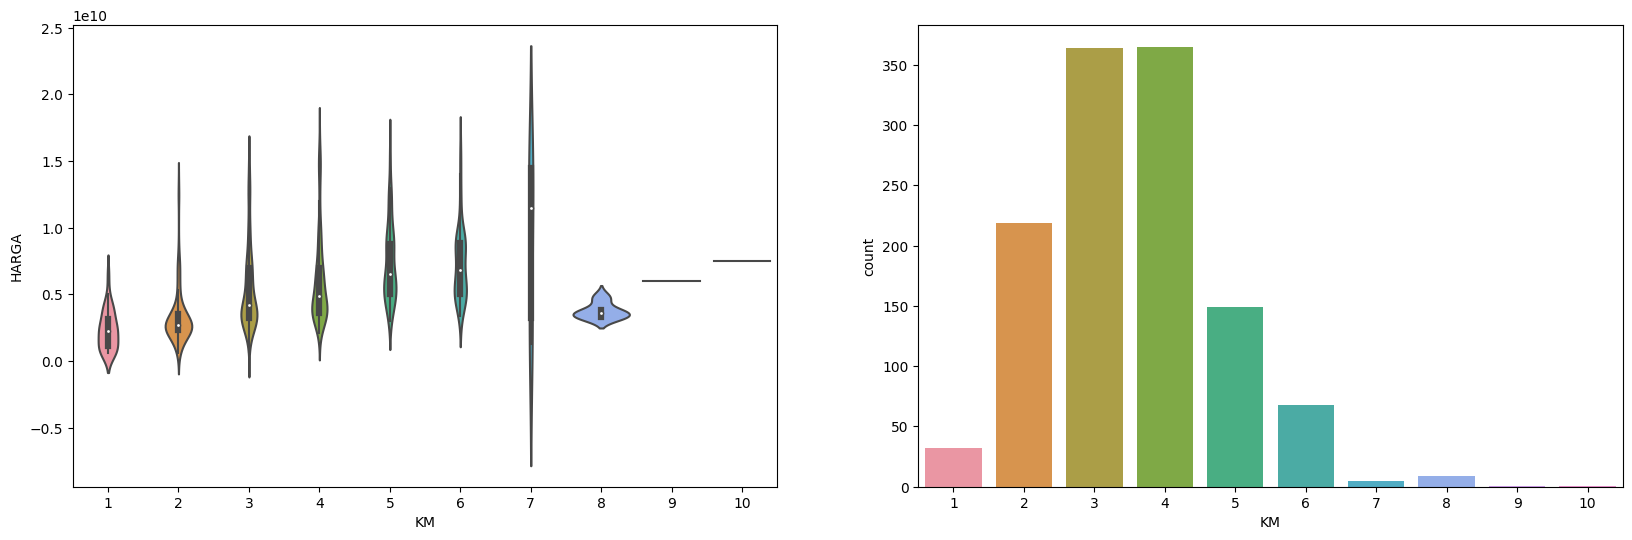

In [147]:
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')

plt.subplot(1, 2, 1)
sns.violinplot(x=df['KM'], y=df['HARGA'])

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='KM')

plt.show()

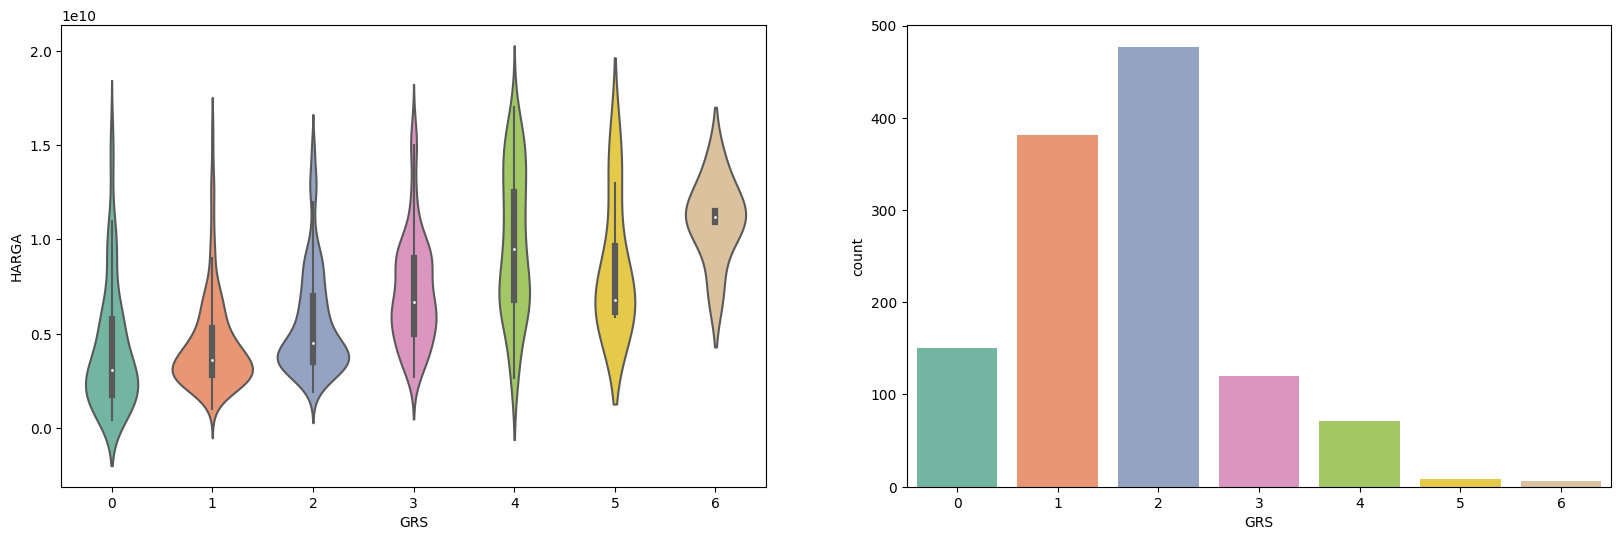

In [148]:
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')

plt.subplot(1, 2, 1)
sns.violinplot(x=df['GRS'], y=df['HARGA'])

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='GRS')

plt.show()

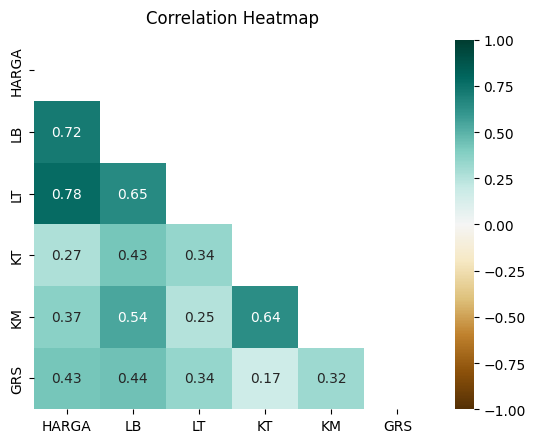

In [83]:
# Increase the size of the heatmap
plt.figure()

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Uji Statistik

### Analisis One Variable Values dari Dua Kelompok Menggunakan Uji Statistik

In [84]:
# Analisis One Variable Values dari Dua Kelompok Menggunakan Uji Statistik
group1 = df[df['GRS'] > 2]['HARGA']
group2 = df[df['GRS'] <= 2]['HARGA']

# Uji Statistik
stat, p_val = ttest_ind(group1, group2)

# Tampilkan hasil
print('Analisis One Variable Values dari Dua Kelompok:')
print('================================')
print('Uji Statistik: t independen')
print('Statistik Uji:', stat)
print('Nilai p:', p_val)
print('================================\n')

Analisis One Variable Values dari Dua Kelompok:
Uji Statistik: t independen
Statistik Uji: 14.800875609852774
Nilai p: 1.1000136932633678e-45



Hasil analisis ini adalah hasil dari uji statistik t independen yang dilakukan untuk menganalisis perbedaan dalam satu variabel (HARGA) antara dua kelompok yang dibagi berdasarkan kondisi variabel GRS.

Pada analisis ini, dilakukan pemisahan data ke dalam dua kelompok berdasarkan kondisi GRS. Kelompok pertama (group1) terdiri dari data dengan nilai GRS yang lebih besar dari 2, sedangkan kelompok kedua (group2) terdiri dari data dengan nilai GRS yang kurang dari atau sama dengan 2.

Selanjutnya, dilakukan uji statistik t independen menggunakan fungsi ttest_ind() untuk membandingkan rata-rata HARGA antara kedua kelompok. Hasil uji statistik ini ditampilkan sebagai berikut:

Statistik Uji: 14.800875609852774
Nilai p: 1.1000136932633678e-45
Statistik uji merupakan nilai t-score yang menggambarkan seberapa besar perbedaan antara rata-rata HARGA kedua kelompok dalam satuan standar deviasi. Nilai yang lebih tinggi menunjukkan perbedaan yang lebih signifikan antara kedua kelompok.

Nilai p menunjukkan tingkat signifikansi statistik. Dalam kasus ini, nilai p sangat kecil (lebih kecil dari tingkat signifikansi yang umumnya digunakan seperti 0.05 atau 0.01), menunjukkan bahwa terdapat perbedaan yang signifikan antara rata-rata HARGA kedua kelompok. Dengan kata lain, terdapat bukti yang cukup kuat untuk menyimpulkan bahwa ada perbedaan yang signifikan dalam HARGA antara kedua kelompok berdasarkan kondisi GRS.

Dengan demikian, hasil analisis ini menyimpulkan bahwa variabel GRS memiliki pengaruh signifikan terhadap variabel HARGA.

In [24]:
# Analisis One Variable Values dari Dua Kelompok Menggunakan Uji Statistik
group1 = df[df['KT'] > 2]['HARGA']
group2 = df[df['KT'] <= 2]['HARGA']

# Uji Statistik
stat, p_val = ttest_ind(group1, group2)

# Tampilkan hasil
print('Analisis One Variable Values dari Dua Kelompok:')
print('================================')
print('Uji Statistik: t independen')
print('Statistik Uji:', stat)
print('Nilai p:', p_val)
print('================================\n')

Analisis One Variable Values dari Dua Kelompok:
Uji Statistik: t independen
Statistik Uji: 6.959868549690747
Nilai p: 5.566671441995264e-12



Hasil analisis ini adalah hasil dari uji statistik t independen yang dilakukan untuk menganalisis perbedaan dalam satu variabel (HARGA) antara dua kelompok yang dibagi berdasarkan kondisi variabel KT.

Pada analisis ini, dilakukan pemisahan data ke dalam dua kelompok berdasarkan kondisi KT. Kelompok pertama (group1) terdiri dari data dengan nilai KT yang lebih besar dari 2, sedangkan kelompok kedua (group2) terdiri dari data dengan nilai KT yang kurang dari atau sama dengan 2.

Selanjutnya, dilakukan uji statistik t independen menggunakan fungsi ttest_ind() untuk membandingkan rata-rata HARGA antara kedua kelompok. Hasil uji statistik ini ditampilkan sebagai berikut:

Statistik Uji: 6.959868549690747
Nilai p: 5.566671441995264e-12
Statistik uji merupakan nilai t-score yang menggambarkan seberapa besar perbedaan antara rata-rata HARGA kedua kelompok dalam satuan standar deviasi. Nilai yang lebih tinggi menunjukkan perbedaan yang lebih signifikan antara kedua kelompok.

Nilai p menunjukkan tingkat signifikansi statistik. Dalam kasus ini, nilai p sangat kecil (lebih kecil dari tingkat signifikansi yang umumnya digunakan seperti 0.05 atau 0.01), menunjukkan bahwa terdapat perbedaan yang signifikan antara rata-rata HARGA kedua kelompok. Dengan kata lain, terdapat bukti yang cukup kuat untuk menyimpulkan bahwa ada perbedaan yang signifikan dalam HARGA antara kedua kelompok berdasarkan kondisi KT.

Dengan demikian, hasil analisis ini menyimpulkan bahwa variabel KT memiliki pengaruh signifikan terhadap variabel HARGA.

In [25]:
# Analisis One Variable Values dari Dua Kelompok Menggunakan Uji Statistik
group1 = df[df['KM'] > 2]['HARGA']
group2 = df[df['KM'] <= 2]['HARGA']

# Uji Statistik
stat, p_val = ttest_ind(group1, group2)

# Tampilkan hasil
print('Analisis One Variable Values dari Dua Kelompok:')
print('================================')
print('Uji Statistik: t independen')
print('Statistik Uji:', stat)
print('Nilai p:', p_val)
print('================================\n')

Analisis One Variable Values dari Dua Kelompok:
Uji Statistik: t independen
Statistik Uji: 13.82537582180635
Nilai p: 1.7871695084114795e-40



Hasil analisis ini adalah hasil dari uji statistik t independen yang dilakukan untuk menganalisis perbedaan dalam satu variabel (HARGA) antara dua kelompok yang dibagi berdasarkan kondisi variabel KM.

Pada analisis ini, dilakukan pemisahan data ke dalam dua kelompok berdasarkan kondisi KM. Kelompok pertama (group1) terdiri dari data dengan nilai KM yang lebih besar dari 2, sedangkan kelompok kedua (group2) terdiri dari data dengan nilai KM yang kurang dari atau sama dengan 2.

Selanjutnya, dilakukan uji statistik t independen menggunakan fungsi ttest_ind() untuk membandingkan rata-rata HARGA antara kedua kelompok. Hasil uji statistik ini ditampilkan sebagai berikut:

Statistik Uji: 13.82537582180635
Nilai p: 1.7871695084114795e-40
Statistik uji merupakan nilai t-score yang menggambarkan seberapa besar perbedaan antara rata-rata HARGA kedua kelompok dalam satuan standar deviasi. Nilai yang lebih tinggi menunjukkan perbedaan yang lebih signifikan antara kedua kelompok.

Nilai p menunjukkan tingkat signifikansi statistik. Dalam kasus ini, nilai p sangat kecil (lebih kecil dari tingkat signifikansi yang umumnya digunakan seperti 0.05 atau 0.01), menunjukkan bahwa terdapat perbedaan yang signifikan antara rata-rata HARGA kedua kelompok. Dengan kata lain, terdapat bukti yang cukup kuat untuk menyimpulkan bahwa ada perbedaan yang signifikan dalam HARGA antara kedua kelompok berdasarkan kondisi KM.

Dengan demikian, hasil analisis ini menyimpulkan bahwa variabel KM memiliki pengaruh signifikan terhadap variabel HARGA.

### Analisis Regresi terhadap Harga

In [122]:
# Analisis Regresi untuk Mengidentifikasi Hubungan antara Variabel
X = df['LB'].values.reshape(-1, 1)
y = df['HARGA'].values

# Analisis Regresi
regression_model = LinearRegression().fit(X, y)

# Tampilkan koefisien regresi
print('Analisis Regresi:')
print('================================')
print(f'Koefisien LB: {regression_model.coef_[0]:.2f}')
print(f'Intersep: {regression_model.intercept_:.2f}')
print('================================\n')

Analisis Regresi:
Koefisien LB: 12150122465.67
Intersep: 1495426164.53



Hasil analisis regresi ini ditampilkan sebagai berikut:

Koefisien LB menunjukkan besarnya perubahan yang diharapkan dalam HARGA ketika LB mengalami perubahan sebesar satu unit. Dalam kasus ini, koefisien LB memiliki nilai 12150122465.67, yang menunjukkan bahwa untuk setiap peningkatan satu unit dalam LB, diharapkan terjadi peningkatan sebesar 12150122465.67 dalam HARGA (dalam satuan yang sama).

Intersep merupakan nilai prediksi HARGA ketika nilai LB adalah nol. Dalam kasus ini, nilai intersep adalah 1495426164.53. Hal ini menunjukkan bahwa jika LB sama dengan nol, maka nilai prediksi HARGA adalah 1495426164.53.

Dengan demikian, hasil analisis regresi ini menyimpulkan bahwa terdapat hubungan linier antara variabel LB (luas bangunan) dan HARGA. Koefisien LB dan intersep memberikan informasi tentang besarnya pengaruh LB terhadap HARGA serta nilai prediksi HARGA ketika LB adalah nol.

In [123]:
# Analisis Regresi untuk Mengidentifikasi Hubungan antara Variabel
X = df['LT'].values.reshape(-1, 1)
y = df['HARGA'].values

# Analisis Regresi
regression_model = LinearRegression().fit(X, y)

# Tampilkan koefisien regresi
print('Analisis Regresi:')
print('================================')
print(f'Koefisien LT: {regression_model.coef_[0]:.2f}')
print(f'Intersep: {regression_model.intercept_:.2f}')
print('================================\n')

Analisis Regresi:
Koefisien LT: 13614687097.27
Intersep: 1009360227.93



Hasil analisis regresi ini ditampilkan sebagai berikut:

Koefisien LT menunjukkan besarnya perubahan yang diharapkan dalam HARGA ketika LT mengalami perubahan sebesar satu unit. Dalam kasus ini, koefisien LT memiliki nilai 13614687097.27, yang menunjukkan bahwa untuk setiap peningkatan satu unit dalam LT, diharapkan terjadi peningkatan sebesar 13614687097.27 dalam HARGA (dalam satuan yang sama).

Intersep merupakan nilai prediksi HARGA ketika nilai LT adalah nol. Dalam kasus ini, nilai intersep adalah 1009360227.93. Hal ini menunjukkan bahwa jika LT sama dengan nol, maka nilai prediksi HARGA adalah 1009360227.93.

Dengan demikian, hasil analisis regresi ini menyimpulkan bahwa terdapat hubungan linier antara variabel LT (luas tanah) dan HARGA. Koefisien LT dan intersep memberikan informasi tentang besarnya pengaruh LT terhadap HARGA serta nilai prediksi HARGA ketika LT adalah nol.

In [124]:
# Analisis Regresi untuk Mengidentifikasi Hubungan antara Variabel
X = df['KM'].values.reshape(-1, 1)
y = df['HARGA'].values

# Analisis Regresi
regression_model = LinearRegression().fit(X, y)

# Tampilkan koefisien regresi
print('Analisis Regresi:')
print('================================')
print(f'Koefisien KM: {regression_model.coef_[0]:.2f}')
print(f'Intersep: {regression_model.intercept_:.2f}')
print('================================\n')

Analisis Regresi:
Koefisien KM: 8408343499.84
Intersep: 3125647821.81



Hasil analisis regresi ini ditampilkan sebagai berikut:

Koefisien KM menunjukkan besarnya perubahan yang diharapkan dalam HARGA ketika KM mengalami perubahan sebesar satu unit. Dalam kasus ini, koefisien KM memiliki nilai 8408343499.84, yang menunjukkan bahwa untuk setiap peningkatan satu unit dalam KM, diharapkan terjadi peningkatan sebesar 8408343499.84 dalam HARGA (dalam satuan yang sama).

Intersep merupakan nilai prediksi HARGA ketika nilai KM adalah nol. Dalam kasus ini, nilai intersep adalah 3125647821.81. Hal ini menunjukkan bahwa jika KM sama dengan nol, maka nilai prediksi HARGA adalah 3125647821.81.

Dengan demikian, hasil analisis regresi ini menyimpulkan bahwa terdapat hubungan linier antara variabel KM (jumlah kamar mandi) dan HARGA. Koefisien KM dan intersep memberikan informasi tentang besarnya pengaruh KM terhadap HARGA serta nilai prediksi HARGA ketika KM adalah nol.

In [125]:
# Analisis Regresi untuk Mengidentifikasi Hubungan antara Variabel
X = df['KT'].values.reshape(-1, 1)
y = df['HARGA'].values

# Analisis Regresi
regression_model = LinearRegression().fit(X, y)

# Tampilkan koefisien regresi
print('Analisis Regresi:')
print('================================')
print(f'Koefisien KT: {regression_model.coef_[0]:.2f}')
print(f'Intersep: {regression_model.intercept_:.2f}')
print('================================\n')

Analisis Regresi:
Koefisien KT: 4698861132.83
Intersep: 3991829327.25



Hasil analisis regresi ini ditampilkan sebagai berikut:

Koefisien KT menunjukkan besarnya perubahan yang diharapkan dalam HARGA ketika KT mengalami perubahan sebesar satu unit. Dalam kasus ini, koefisien KT memiliki nilai 4698861132.83, yang menunjukkan bahwa untuk setiap peningkatan satu unit dalam KT, diharapkan terjadi peningkatan sebesar 4698861132.83 dalam HARGA (dalam satuan yang sama).

Intersep merupakan nilai prediksi HARGA ketika nilai KT adalah nol. Dalam kasus ini, nilai intersep adalah 3991829327.25. Hal ini menunjukkan bahwa jika KT sama dengan nol, maka nilai prediksi HARGA adalah 3991829327.25.

Dengan demikian, hasil analisis regresi ini menyimpulkan bahwa terdapat hubungan linier antara variabel KT (jumlah kamar tidur) dan HARGA. Koefisien KT dan intersep memberikan informasi tentang besarnya pengaruh KT terhadap HARGA serta nilai prediksi HARGA ketika KT adalah nol.

In [127]:
# Analisis Regresi untuk Mengidentifikasi Hubungan antara Variabel
X = df['GRS'].values.reshape(-1, 1)
y = df['HARGA'].values

# Analisis Regresi
regression_model = LinearRegression().fit(X, y)

# Tampilkan koefisien regresi
print('Analisis Regresi:')
print('================================')
print(f'Koefisien GRS: {regression_model.coef_[0]:.2f}')
print(f'Intersep: {regression_model.intercept_:.2f}')
print('================================\n')

Analisis Regresi:
Koefisien GRS: 7578044134.23
Intersep: 3364325451.54



Hasil analisis regresi ini ditampilkan sebagai berikut:

Koefisien GRS menunjukkan besarnya perubahan yang diharapkan dalam HARGA ketika GRS mengalami perubahan sebesar satu unit. Dalam kasus ini, koefisien GRS memiliki nilai 7578044134.23, yang menunjukkan bahwa untuk setiap peningkatan satu unit dalam GRS, diharapkan terjadi peningkatan sebesar 7578044134.23 dalam HARGA (dalam satuan yang sama).

Intersep merupakan nilai prediksi HARGA ketika nilai GRS adalah nol. Dalam kasus ini, nilai intersep adalah 3364325451.54. Hal ini menunjukkan bahwa jika GRS sama dengan nol, maka nilai prediksi HARGA adalah 3364325451.54.

Dengan demikian, hasil analisis regresi ini menyimpulkan bahwa terdapat hubungan linier antara variabel GRS (luas tanah) dan HARGA. Koefisien GRS dan intersep memberikan informasi tentang besarnya pengaruh GRS terhadap HARGA serta nilai prediksi HARGA ketika GRS adalah nol.

# Modeling and Evaluation

In [85]:
scaler = MinMaxScaler()
df[['LB', 'LT', 'KT', 'KM', 'GRS']] = scaler.fit_transform(df[['LB', 'LT', 'KT', 'KM', 'GRS']])

In [86]:
# 3. Prediksi Harga Rumah Menggunakan Regresi Model
features = ['LB', 'LT', 'KT', 'KM', 'GRS']
X = df[features]
y = df['HARGA']

In [87]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

### Linear Regression

In [88]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [89]:
# Value of y intercept
lm.intercept_

-12957324.820475578

In [90]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,LB,5950538397.652389
1,LT,9576163262.231716
2,KT,-2719575454.384602
3,KM,2478156286.239121
4,GRS,1902970996.770965


Analisis ini menunjukkan hasil koefisien dari variabel-variabel yang digunakan dalam model regresi. Setiap variabel memiliki koefisien yang menunjukkan pengaruhnya terhadap variabel target, dalam hal ini HARGA.

Berikut adalah penjelasan untuk setiap koefisien:

Koefisien LB (Luas Bangunan): 5950538397.652389
Koefisien ini menunjukkan perubahan yang diharapkan dalam HARGA ketika Luas Bangunan (LB) mengalami peningkatan satu unit. Dalam kasus ini, setiap peningkatan satu unit dalam LB diharapkan menyebabkan peningkatan sebesar 5950538397.652389 dalam HARGA.

Koefisien LT (Luas Tanah): 9576163262.231716
Koefisien ini menunjukkan perubahan yang diharapkan dalam HARGA ketika Luas Tanah (LT) mengalami peningkatan satu unit. Dalam kasus ini, setiap peningkatan satu unit dalam LT diharapkan menyebabkan peningkatan sebesar 9576163262.231716 dalam HARGA.

Koefisien KT (Jumlah Kamar Tidur): -2719575454.384602
Koefisien ini menunjukkan perubahan yang diharapkan dalam HARGA ketika Jumlah Kamar Tidur (KT) mengalami peningkatan satu unit. Dalam kasus ini, setiap peningkatan satu unit dalam KT diharapkan menyebabkan penurunan sebesar 2719575454.384602 dalam HARGA. Koefisien negatif menunjukkan bahwa penambahan kamar tidur cenderung berhubungan dengan penurunan harga rumah.

Koefisien KM (Jumlah Kamar Mandi): 2478156286.239121
Koefisien ini menunjukkan perubahan yang diharapkan dalam HARGA ketika Jumlah Kamar Mandi (KM) mengalami peningkatan satu unit. Dalam kasus ini, setiap peningkatan satu unit dalam KM diharapkan menyebabkan peningkatan sebesar 2478156286.239121 dalam HARGA.

Koefisien GRS (Luas Tanah): 1902970996.770965
Koefisien ini menunjukkan perubahan yang diharapkan dalam HARGA ketika Luas Tanah (GRS) mengalami peningkatan satu unit. Dalam kasus ini, setiap peningkatan satu unit dalam GRS diharapkan menyebabkan peningkatan sebesar 1902970996.770965 dalam HARGA.

Dengan melihat koefisien-koefisien ini, kita dapat mengetahui sejauh mana setiap variabel berkontribusi terhadap nilai HARGA. Koefisien yang positif menunjukkan bahwa peningkatan nilai variabel tersebut berhubungan dengan peningkatan harga rumah, sementara koefisien yang negatif menunjukkan hubungan sebaliknya.

In [91]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [130]:
# Evaluasi model menggunakan MSE
print('Evaluasi Model Train:')
print('================================')
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('================================')

Evaluasi Model Train:
R^2: 0.9878014606798065
Adjusted R^2: 0.9877291087265432
MAE: 132624572.05771495
MSE: 1.3208051055779755e+17
RMSE: 363428824.6105385


Berikut adalah penjelasan untuk setiap metrik evaluasi:

* R^2 (Coefficient of Determination): 0.9878014606798065
R^2 adalah ukuran seberapa baik model kita cocok dengan data. Nilai R^2 berkisar antara 0 dan 1, dengan nilai 1 menunjukkan bahwa model sepenuhnya menjelaskan variasi data. Dalam kasus ini, nilai R^2 sebesar 0.9878014606798065 menunjukkan bahwa model kita mampu menjelaskan sekitar 98.78% variasi dalam data latih.

* Adjusted R^2: 0.9877291087265432
Adjusted R^2 adalah varian dari R^2 yang disesuaikan dengan jumlah fitur yang digunakan dalam model. Hal ini penting untuk menghindari peningkatan artifisial dalam R^2 karena penambahan fitur yang tidak signifikan. Dalam kasus ini, nilai Adjusted R^2 sebesar 0.9877291087265432 memberikan ukuran yang lebih konservatif terhadap kualitas model.

* MAE (Mean Absolute Error): 132624572.05771495
MAE adalah rata-rata dari selisih absolut antara nilai yang diprediksi oleh model dan nilai yang sebenarnya. MAE mengukur sejauh mana rata-rata kesalahan prediksi dari nilai sebenarnya. Dalam kasus ini, nilai MAE sebesar 132624572.05771495 menunjukkan rata-rata kesalahan prediksi sekitar 132,624,572 unit dalam satuan yang sama dengan variabel HARGA.

* MSE (Mean Squared Error): 1.3208051055779755e+17
MSE adalah rata-rata dari kuadrat selisih antara nilai yang diprediksi oleh model dan nilai yang sebenarnya. MSE memberikan bobot yang lebih tinggi pada kesalahan yang lebih besar. Dalam kasus ini, nilai MSE sebesar 1.3208051055779755e+17 memberikan ukuran kesalahan prediksi secara keseluruhan.

* RMSE (Root Mean Squared Error): 363428824.6105385
RMSE adalah akar kuadrat dari MSE. RMSE memberikan ukuran kesalahan prediksi dalam satuan yang sama dengan variabel yang diprediksi. Dalam kasus ini, nilai RMSE sebesar 363428824.6105385 menunjukkan sejauh mana prediksi kita biasanya keliru dalam memperkirakan nilai HARGA.

Secara keseluruhan, hasil evaluasi ini menunjukkan bahwa model regresi memiliki kinerja yang baik dalam memprediksi variabel HARGA berdasarkan data latih, dengan tingkat penjelasan yang tinggi (R^2), kesalahan prediksi yang relatif rendah (MAE, MSE, RMSE), dan nilai Adjusted R^2 yang mempertimbangkan jumlah fitur dalam model. Namun, penting untuk diingat bahwa evaluasi ini hanya berdasarkan pada data latih dan kemungkinan masih perlu dievaluasi lebih lanjut menggunakan data uji yang terpisah untuk mendapatkan pemahaman yang lebih lengkap tentang kinerja model.

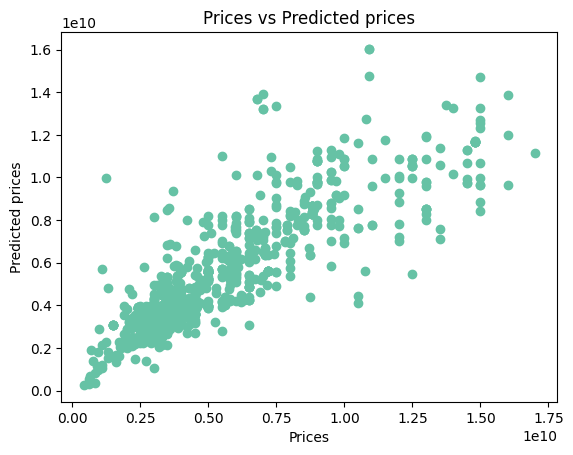

In [94]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

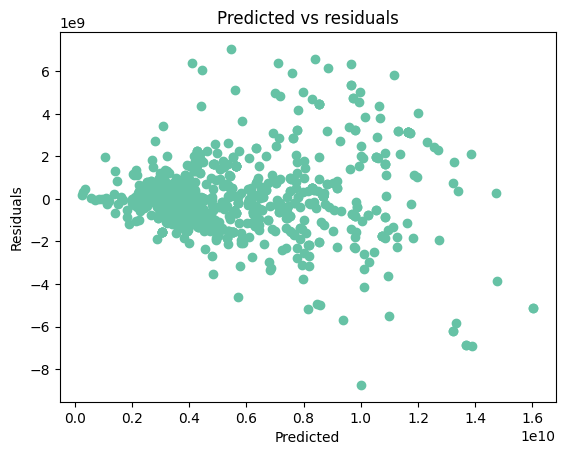

In [98]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

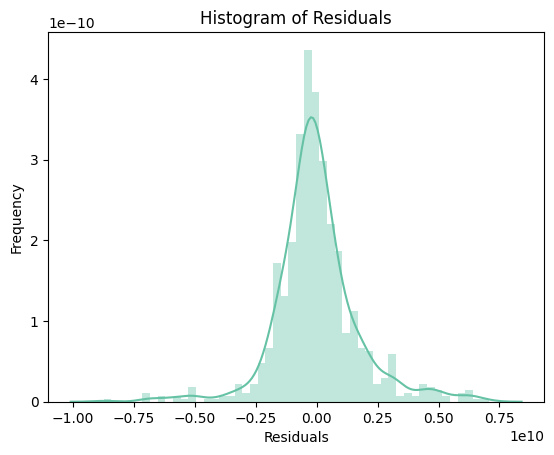

In [99]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [100]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [133]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
# Evaluasi model menggunakan MSE
print('Evaluasi Model Linear Regression Test:')
print('================================')
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('================================')

Evaluasi Model Linear Regression Test:
R^2: 0.7418209764822714
Adjusted R^2: 0.7382151241985042
MAE: 817930264.9917582
MSE: 2.3632056238749286e+18
RMSE: 1537272137.2206447


Evaluasi ini memberikan hasil kinerja model regresi linear pada data uji (test). Berikut adalah penjelasan untuk setiap metrik evaluasi:

* R^2 (Coefficient of Determination): 0.7418209764822714
R^2 adalah ukuran seberapa baik model cocok dengan data uji. Nilai R^2 berkisar antara 0 dan 1, dengan nilai 1 menunjukkan bahwa model sepenuhnya menjelaskan variasi data. Dalam kasus ini, nilai R^2 sebesar 0.7418209764822714 menunjukkan bahwa model mampu menjelaskan sekitar 74.18% variasi dalam data uji.

* Adjusted R^2: 0.7382151241985042
Adjusted R^2 adalah varian dari R^2 yang disesuaikan dengan jumlah fitur yang digunakan dalam model. Hal ini penting untuk menghindari peningkatan artifisial dalam R^2 karena penambahan fitur yang tidak signifikan. Dalam kasus ini, nilai Adjusted R^2 sebesar 0.7382151241985042 memberikan ukuran yang lebih konservatif terhadap kualitas model pada data uji.

* MAE (Mean Absolute Error): 817930264.9917582
MAE adalah rata-rata dari selisih absolut antara nilai yang diprediksi oleh model dan nilai yang sebenarnya pada data uji. MAE mengukur sejauh mana rata-rata kesalahan prediksi dari nilai sebenarnya. Dalam kasus ini, nilai MAE sebesar 817930264.9917582 menunjukkan rata-rata kesalahan prediksi sekitar 817,930,264 unit dalam satuan yang sama dengan variabel HARGA pada data uji.

* MSE (Mean Squared Error): 2.3632056238749286e+18
MSE adalah rata-rata dari kuadrat selisih antara nilai yang diprediksi oleh model dan nilai yang sebenarnya pada data uji. MSE memberikan bobot yang lebih tinggi pada kesalahan yang lebih besar. Dalam kasus ini, nilai MSE sebesar 2.3632056238749286e+18 memberikan ukuran kesalahan prediksi secara keseluruhan pada data uji.

* RMSE (Root Mean Squared Error): 1537272137.2206447
RMSE adalah akar kuadrat dari MSE. RMSE memberikan ukuran kesalahan prediksi dalam satuan yang sama dengan variabel yang diprediksi. Dalam kasus ini, nilai RMSE sebesar 1537272137.2206447 menunjukkan sejauh mana prediksi biasanya keliru dalam memperkirakan nilai HARGA pada data uji.


# Kesimpulan dan Rekomendasi

Berdasarkan hasil analisis menggunakan pendekatan regresi linear pada data rumah di Tebet, kita dapat mencapai beberapa kesimpulan dan rekomendasi:

**Hubungan antara variabel:**

* Koefisien LB (Luas Bangunan) memiliki nilai positif yang cukup besar, menunjukkan bahwa semakin besar luas bangunan, harga rumah cenderung lebih tinggi.
* Koefisien LT (Luas Tanah) juga memiliki nilai positif yang besar, menunjukkan bahwa semakin besar luas tanah, harga rumah cenderung lebih tinggi.
* Koefisien KT (Jumlah Kamar Tidur) memiliki nilai negatif, menunjukkan bahwa jumlah kamar tidur yang lebih besar cenderung berhubungan dengan harga rumah yang lebih rendah.
* Koefisien KM (Jumlah Kamar Mandi) memiliki nilai positif, menunjukkan bahwa jumlah kamar mandi yang lebih besar cenderung berhubungan dengan harga rumah yang lebih tinggi.
* Koefisien GRS (Grade Rumah) memiliki nilai positif, menunjukkan bahwa tingkat kualitas rumah yang lebih tinggi cenderung berhubungan dengan harga rumah yang lebih tinggi.

**Evaluasi Model:**

Model regresi linear memberikan kinerja yang baik pada data latih, dengan R^2 sekitar 0.9878. Hal ini menunjukkan bahwa model dapat menjelaskan sekitar 98.78% variasi dalam data latih.
Namun, kinerja model pada data uji tidak sebaik pada data latih. Meskipun R^2 masih tinggi (sekitar 0.7418), terdapat perbedaan yang signifikan antara evaluasi pada data latih dan data uji.
MAE dan RMSE yang tinggi menunjukkan bahwa ada kesalahan prediksi yang signifikan dalam memperkirakan harga rumah pada data uji.
Berdasarkan kesimpulan ini, ada beberapa rekomendasi yang dapat diberikan:

* Perlu dipertimbangkan untuk memperkaya model dengan memasukkan fitur-fitur tambahan yang relevan yang dapat meningkatkan kinerja pada data uji. Misalnya, fitur-fitur seperti lokasi geografis, fasilitas di sekitar, atau atribut lainnya yang dapat mempengaruhi harga rumah.

* Model dapat ditingkatkan dengan menggunakan metode regresi yang lebih canggih atau menggabungkan beberapa metode ensemble untuk meningkatkan prediksi harga rumah.

* Sebaiknya dilakukan pengecekan dan pemrosesan ulang terhadap data untuk mengidentifikasi dan mengatasi potensi masalah seperti outliers, missing values, atau distribusi yang tidak normal. Hal ini dapat membantu meningkatkan kualitas dan keandalan model.

* Penting juga untuk menggali lebih dalam faktor-faktor yang mempengaruhi harga rumah di kawasan Tebet. Informasi tambahan seperti tren pasar, kebijakan pemerintah, atau faktor-faktor ekonomi yang mempengaruhi permintaan dan penawaran properti dapat memberikan pemahaman yang lebih baik tentang faktor-faktor yang perlu dipertimbangkan dalam analisis harga rumah.

* Model ini sebaiknya tidak digunakan sebagai satu-satunya acuan dalam menentukan harga rumah di kawasan Tebet. Dalam prakteknya, sebaiknya dilakukan penilaian yang lebih komprehensif dengan melibatkan pengetahuan dan wawasan dari profesional di bidang properti untuk memperoleh estimasi harga yang lebih akurat.